In [6]:
# Importing all the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
import copy
sns.set() # setting the default seaborn style for our plots.

### Problem1
### Wholesale Customers Analysis
### Problem Statement:
### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [7]:
# load the data to the notebook.
data=pd.read_csv('Wholesale+Customers+Data.csv')

In [8]:
# checking the head of the data frame.
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [9]:
# checking the data info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [10]:
# checking shape of the data.
data.shape

(440, 9)

In [11]:
# check for missing values.
data.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [12]:
# checking the summary of the data frame.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [13]:
# Deleting Buyer/Spender as there is no use of Buyer/Spender and checking the head again.
data_df=copy.deepcopy(data)
del data_df['Buyer/Spender']
data_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


## Question 1.1 Use methods of descriptive statistics to summarize data. Whhich Region and which Channel spent the most? Which Region and which Channel spent the least?

In [14]:
print('Descriptive statistics for Data including Channel and Retail:')
data_df.describe(include='all').T

Descriptive statistics for Data including Channel and Retail:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [15]:
spending_df= data_df.copy()
spending_df['Spending']= data_df['Fresh']+data_df['Milk']+data_df['Grocery']+data_df['Frozen']+data_df['Detergents_Paper']+data_df['Delicatessen']
spending_df.head()  # Creating the coloumn Spending with sum of all products.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [16]:
region_df= spending_df.groupby('Region')['Spending'].sum()
region_df

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64

In [20]:
channel_df= spending_df.groupby('Channel')['Spending'].sum()
channel_df

Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64

###  "Hotel" channel spend amount is "7999569" with the highest spend amount and
###  "Retail" channel spend amount is "6619931" with the least spend amount .

In [21]:
region_channel_df= spending_df.groupby(['Region'])['Spending'].sum()
print(region_channel_df)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64


### "Other" region spend amount is "10677599" with the highest spend amount and
### "Oporto" region spend amount is "1555088" and has least spend amount by region.

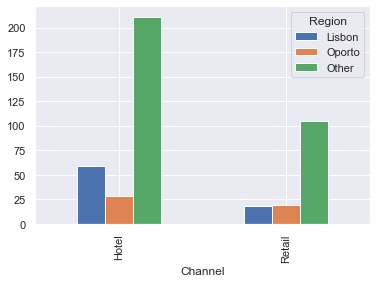

Region   Lisbon  Oporto  Other
Channel                       
Hotel        59      28    211
Retail       18      19    105


In [22]:
def categorical_multi(i,j):
    pd.crosstab(data_df[i],data_df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(data_df[i],data_df[j]))

categorical_multi(i='Channel',j='Region')   

## Question 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [23]:
# minimum, maximum, IQR, spread of variable, etc. Can be concluded from describe() function only.
# So we need to describe the data based on Region and Channel.
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


Text(0.5, 1.0, 'Item-Fresh')

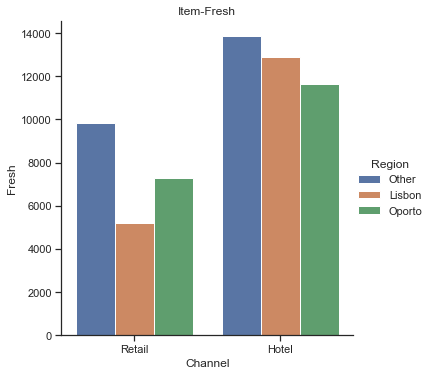

In [24]:
# Using bar plot to see behavior in all items across Channel and Region.
sns.set(style='ticks',color_codes=True)
sns.catplot(x='Channel',y='Fresh',hue='Region',kind='bar',ci=None,data=data_df)
plt.title('Item-Fresh')

Text(0.5, 1.0, 'Item-Fresh')

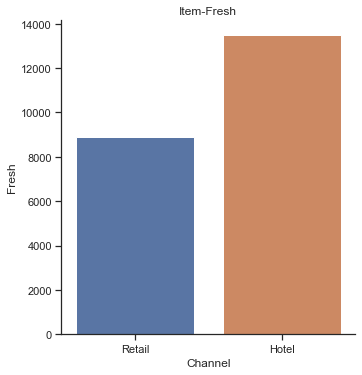

In [25]:
sns.catplot(x='Channel',y='Fresh',kind='bar',ci=None,data=data_df)
plt.title('Item-Fresh')

Text(0.5, 1.0, 'Item-Fresh')

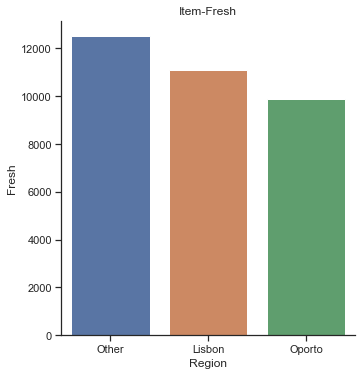

In [26]:
sns.catplot(x='Region',y='Fresh',kind='bar',ci=None,data=data_df)
plt.title('Item-Fresh')

### It is clear that the Fresh item is sold more in the Channel "Hotel" in "Other" Region.

Text(0.5, 1.0, 'Item-Milk')

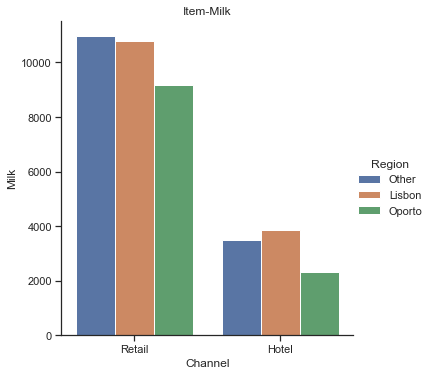

In [27]:
sns.set(style='ticks',color_codes=True)
sns.catplot(x='Channel',y='Milk',hue='Region',kind='bar',ci=None,data=data_df)
plt.title('Item-Milk')

Text(0.5, 1.0, 'Item-Milk')

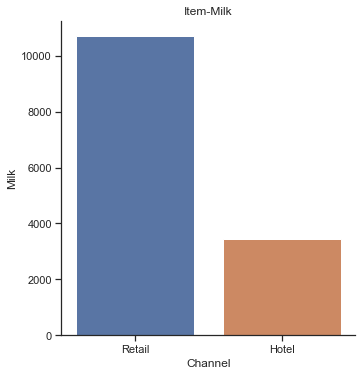

In [28]:
sns.catplot(x='Channel',y='Milk',kind='bar',ci=None,data=data_df)
plt.title('Item-Milk')

Text(0.5, 1.0, 'Item-Milk')

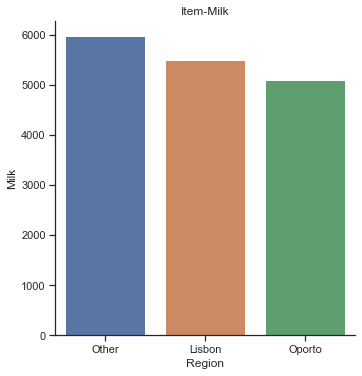

In [29]:
sns.catplot(x='Region',y='Milk',kind='bar',ci=None,data=data_df)
plt.title('Item-Milk')

### MIlk is sold more in the "Retail" Channel in "Other Region.

Text(0.5, 1.0, 'Item-Grocery')

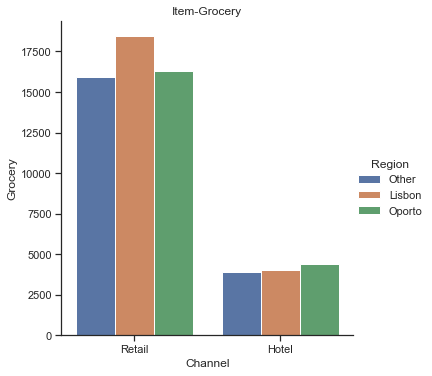

In [30]:
sns.set(style='ticks',color_codes=True)
sns.catplot(x='Channel',y='Grocery',hue='Region',kind='bar',ci=None,data=data_df)
plt.title('Item-Grocery')

Text(0.5, 1.0, 'Item-Grocery')

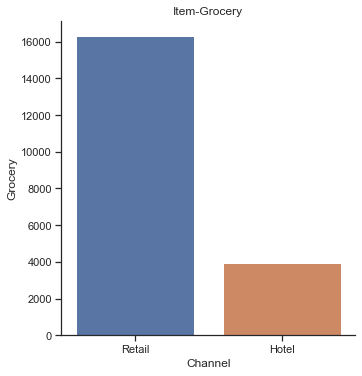

In [31]:
sns.catplot(x='Channel',y='Grocery',kind='bar',ci=None,data=data_df)
plt.title('Item-Grocery')

Text(0.5, 1.0, 'Item-Grocery')

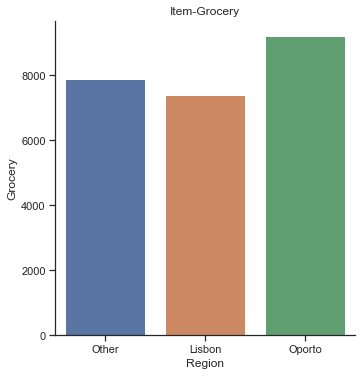

In [32]:
sns.catplot(x='Region',y='Grocery',kind='bar',ci=None,data=data_df)
plt.title('Item-Grocery')

### "Grocery" is sold more in the "Retail" Channel in "Oporto" Region.

Text(0.5, 1.0, 'Item-Frozen')

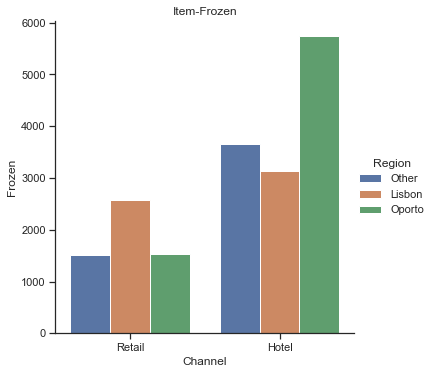

In [33]:
sns.set(style='ticks',color_codes=True)
sns.catplot(x='Channel',y='Frozen',hue='Region',kind='bar',ci=None,data=data_df)
plt.title('Item-Frozen')

Text(0.5, 1.0, 'Item-Frozen')

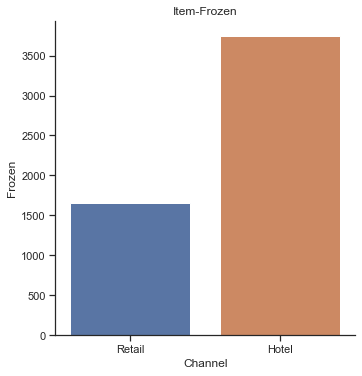

In [34]:
sns.catplot(x='Channel',y='Frozen',kind='bar',ci=None,data=data_df)
plt.title('Item-Frozen')

Text(0.5, 1.0, 'Item-Frozen')

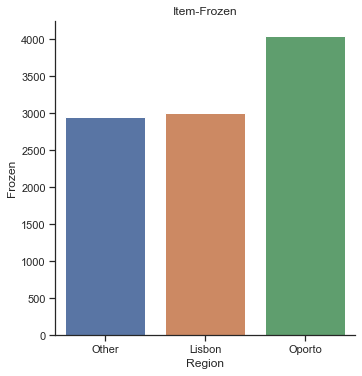

In [35]:
sns.catplot(x='Region',y='Frozen',kind='bar',ci=None,data=data_df)
plt.title('Item-Frozen')

### "Frozen" Item is sold more in Channel "Hotel" in "Oporto" Region.

Text(0.5, 1.0, 'Item-Detergents_Paper')

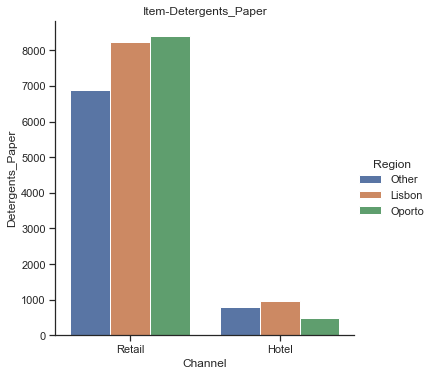

In [36]:
sns.set(style='ticks',color_codes=True)
sns.catplot(x='Channel',y='Detergents_Paper',hue='Region',kind='bar',ci=None,data=data_df)
plt.title('Item-Detergents_Paper')

Text(0.5, 1.0, 'Item-Detergents_Paper')

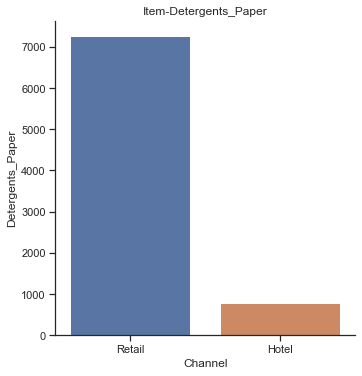

In [37]:
sns.catplot(x='Channel',y='Detergents_Paper',kind='bar',ci=None,data=data_df)
plt.title('Item-Detergents_Paper')

Text(0.5, 1.0, 'Item-Detergents_Paper')

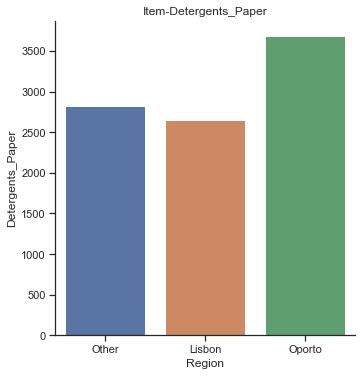

In [38]:
sns.catplot(x='Region',y='Detergents_Paper',kind='bar',ci=None,data=data_df)
plt.title('Item-Detergents_Paper')

### "Detergents_Paper" sold more in "Retail" Channel in "Oporto" Region.

Text(0.5, 1.0, 'Delicatessen')

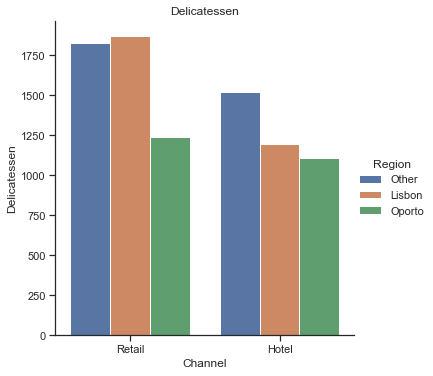

In [39]:
sns.set(style='ticks',color_codes=True)
sns.catplot(x='Channel',y='Delicatessen',hue='Region',kind='bar',ci=None,data=data_df)
plt.title('Delicatessen')

Text(0.5, 1.0, 'Delicatessen')

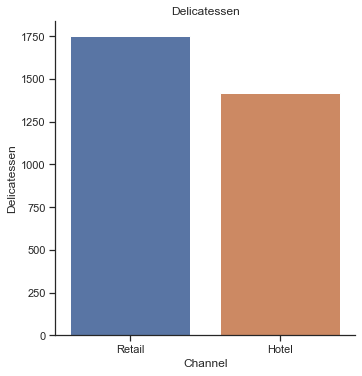

In [40]:
sns.catplot(x='Channel',y='Delicatessen',kind='bar',ci=None,data=data_df)
plt.title('Delicatessen')

Text(0.5, 1.0, 'Delicatessen')

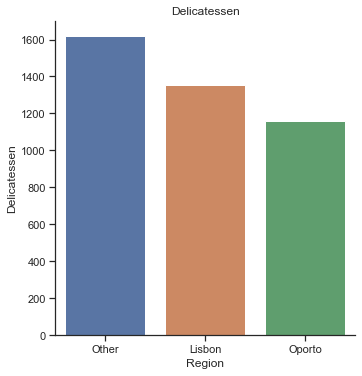

In [41]:
sns.catplot(x='Region',y='Delicatessen',kind='bar',ci=None,data=data_df)
plt.title('Delicatessen')

### "Delicatessen" sold more in "Retail " Channel in "Other" Region.

## Question 1.3 On the basis of descriptive measure of variability, which item shows the most inconsistent behavior? Which item shows the least inconsistent behavior?

In [42]:
# we will use descriptive measures of variability like Standard Deviation and Coefficient of Variance.
std= data_df.std().round(2)  # will give Standard Deviation of each Item.
std

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
dtype: float64

### On the basis of standard deviation we found that: 
- Fresh item have highest Standard deviation so that is most Inconsistent.

- Delicatessen item have smallest Standard deviation, So that is least inconsistent.

In [43]:
# Lets check with Coefficient of Variance.
cov= np.std(data_df)/np.mean(data_df)
cov

Fresh               1.052720
Milk                1.271851
Grocery             1.193815
Frozen              1.578536
Detergents_Paper    1.652766
Delicatessen        1.847304
dtype: float64

### On the basis of Coefficient of Variance it is clear that:
- "Fresh" item have lowest coefficient of variation, So that is least Inconsistent.
- "Delicatessen" item have highest coefficient of variation, So that is most Inconsistent.

#### Coefficient of Variation for Fresh is 1.052720

#### Coefficient of Variation for Milk is 1.271851

#### Coefficient of Variation for Grocery is 1.193815

#### Coefficient of Variation for Frozen is 1.578536

#### Coefficient of Variation for Detergents_Paper is 1.652766

#### Coefficient of Variation for Delicatessen is 1.847304

## Question 1.4  Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

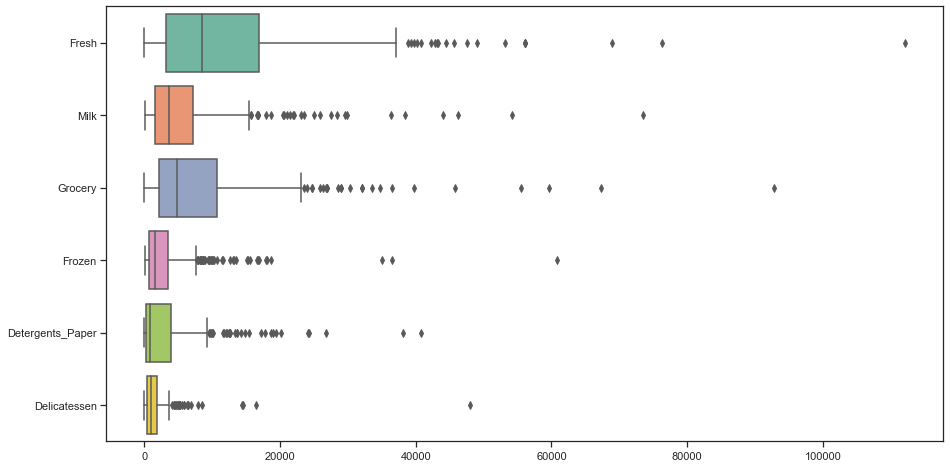

In [44]:
# For finding outliers, boxplot is the ideal method. 
plt.figure(figsize=(15,8))
sns.boxplot(data=data_df,orient='h',palette='Set2')

### Yes there are outliers in all the items across the product range (Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicatessen)
- Outliers are detected but not necessarily removed, it depends on the situation. Here i will assume that the wholesale distributor provided us a data set with correct data, So i will keep them as it is.

## Question 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

In [45]:
print("- As per the analysis, I found out that there are inconsistencies in spending of different items (by calculating Coefficient of Variance), Which should be minimized.\n- The spending of Hotel and Retail Channel are different which should be more or less equal.\n- And also spent should equal for different regions. Need to focus on other items also than 'Fresh' and 'Grocery'")

- As per the analysis, I found out that there are inconsistencies in spending of different items (by calculating Coefficient of Variance), Which should be minimized.
- The spending of Hotel and Retail Channel are different which should be more or less equal.
- And also spent should equal for different regions. Need to focus on other items also than 'Fresh' and 'Grocery'


- As per the analysis, I found out that there are inconsistencies in spending of different items (by calculating Coefficient of Variance), Which should be minimized.
- The spending of Hotel and Retail Channel are different which should be more or less equal.
- And also spent should equal for different regions. Need to focus on other items also than 'Fresh' and 'Grocery'.

### Problem 2
### Problem statement:
### The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set)

In [46]:
# load the data to the notebook.
survey_df=pd.read_csv('Survey-1.csv')

In [47]:
# Checking the head of data frame.
survey_df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [48]:
# checking the data info.
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [49]:
# checking shape of the data.
survey_df.shape

(62, 14)

In [50]:
# check for missing values.
survey_df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [51]:
# checking the summary of the data frame.
survey_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


## Question 2.1 For this data, construct the following contingency tables (keep Gender as row variable)
- 2.1.1 Gender and Major
- 2.1.2 Gender and Grad Intention
- 2.1.3 Gender and Employment
- 2.1.4 Gender and Computer

### 2.1.1 Gender and Major


In [52]:
# constructing the contingency table for Gender and Major.
table_1= pd.crosstab(survey_df['Gender'],survey_df['Major'],margins=True)
table_1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


### 2.1.2 Gender and Grad Intention

In [53]:
# Constructing the contingency table for Gender and Grad Intention.
table_2= pd.crosstab(survey_df['Gender'],survey_df['Grad Intention'],margins=True)
table_2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


### 2.1.3 Gender and Employment

In [54]:
# constructing the contingency table for Gender and Employment.
table_3= pd.crosstab(survey_df['Gender'],survey_df['Employment'],margins=True)
table_3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


### 2.1.4 Gender and Computer

In [55]:
# Constructing the contingency table for Gender and Computer.
table_4= pd.crosstab(survey_df['Gender'],survey_df['Computer'],margins=True)
table_4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## Question 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

- 2.2.1. What is the probability that a randomly selected CMSU student will be male?

- 2.2.2. What is the probability that a randomly selected CMSU student will be female?

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [56]:
# Calculating total number of male and female.
survey_df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

### The total number of Female is : 33
### and the total number of Male is : 29

In [57]:
# Calculating the probability for randomly selected CMSU student will be male.
total_male= 29
total_undergraduates= 62
prob_male= round(total_male/total_undergraduates,4)*100
print("Probability that a randomly selected CMSU student will be male is %1.2f" %prob_male +"%")

Probability that a randomly selected CMSU student will be male is 46.77%


###  probability that a randomly selected CMSU student will be male is "46.77%"

## 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [58]:
# Calculating the probability for randomly selected CMSU student will be female.
total_female= 33
total_undergraduates= 62
prob_male= round(total_female/total_undergraduates,4)*100
print("Probability that a randomly selected CMSU student will be female is %1.2f" %prob_male +"%")

Probability that a randomly selected CMSU student will be female is 53.23%


### probability that a randomly selected CMSU student will be female is "53.23%"

## Question 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

- 2.3.1 Find the conditional probability of different majors among the male students in CMSU.
- 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

Using contingency table of Gender and Major we got the total number of male and number of male opting for different major.

In [59]:
# constructing the contingency table for Gender and Major.
table_1= pd.crosstab(survey_df['Gender'],survey_df['Major'],margins=True)
table_1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [60]:
total_male= 29
total_accounting= 4
prob_accounting= round(total_accounting/total_male,4)*100
print("Probability of Males opting for Accounting is %1.2f" %prob_accounting + '%')
print(' ')
total_cis= 1
prob_cis= round(total_cis/total_male,4)*100
print("Probability of Males opting for CIS is %1.2f" %prob_cis +'%')
print(' ')
total_ecofi= 4
prob_ecofi= round(total_ecofi/total_male,4)*100
print("Probability of Males opting for Economics/Finance is %1.2f" %prob_ecofi +'%')
print(' ')
total_business= 2
prob_business= round(total_business/total_male,4)*100
print("Probability of Males opting for InternationalBusiness is %1.2f" %prob_business +'%')
print(' ')
total_management= 6
prob_management= round(total_management/total_male,4)*100
print("Probability of Males opting for Management is %1.2f" %prob_management +'%')
print(' ') 
total_other= 4
prob_other= round(total_other/total_male,4)*100
print("Probability of Males opting for Other is %1.2f" %prob_other +'%')
print(' ')
total_retail_marketing= 5
prob_retail_marketing= round(total_retail_marketing/total_male,4)*100
print("Probability of Males opting for Retailing/Marketing is %1.2f" %prob_retail_marketing +'%')
print(' ')
total_undecided= 3
prob_undecided= round(total_undecided/total_male,4)*100
print("Probability of Males opting for Undecided is %1.2f" %prob_undecided +'%')

Probability of Males opting for Accounting is 13.79%
 
Probability of Males opting for CIS is 3.45%
 
Probability of Males opting for Economics/Finance is 13.79%
 
Probability of Males opting for InternationalBusiness is 6.90%
 
Probability of Males opting for Management is 20.69%
 
Probability of Males opting for Other is 13.79%
 
Probability of Males opting for Retailing/Marketing is 17.24%
 
Probability of Males opting for Undecided is 10.34%


#### From above results we can easily say that most of the males students prefer Management as Majors and CIS is the least preferred one.

### 2.3.2 Find the conditional probability of different majors among the female  students of CMSU.

Using contingency table of Gender and Major we got the total number of female and number of female opting for different major.

In [61]:
total_female= 33
total_accounting= 3
prob_accounting= round(total_accounting/total_female,4)*100
print("Probability of Females opting for Accounting is %1.2f" %prob_accounting + '%')
print(' ')
total_cis= 3
prob_cis= round(total_cis/total_female,4)*100
print("Probability of Females opting for CIS is %1.2f" %prob_cis +'%')
print(' ')
total_ecofi= 7
prob_ecofi= round(total_ecofi/total_female,4)*100
print("Probability of Females opting for Economics/Finance is %1.2f" %prob_ecofi +'%')
print(' ')
total_business= 4
prob_business= round(total_business/total_female,4)*100
print("Probability of Females opting for InternationalBusiness is %1.2f" %prob_business +'%')
print(' ')
total_management= 4
prob_management= round(total_management/total_female,4)*100
print("Probability of Females opting for Management is %1.2f" %prob_management +'%')
print(' ') 
total_other= 3
prob_other= round(total_other/total_female,4)*100
print("Probability of Females opting for Other is %1.2f" %prob_other +'%')
print(' ')
total_retail_marketing= 9
prob_retail_marketing= round(total_retail_marketing/total_female,4)*100
print("Probability of Females opting for Retailing/Marketing is %1.2f" %prob_retail_marketing +'%')
print(' ')
total_undecided= 0
prob_undecided= round(total_undecided/total_female,4)*100
print("Probability of Females opting for Undecided is %1.2f" %prob_undecided +'%')

Probability of Females opting for Accounting is 9.09%
 
Probability of Females opting for CIS is 9.09%
 
Probability of Females opting for Economics/Finance is 21.21%
 
Probability of Females opting for InternationalBusiness is 12.12%
 
Probability of Females opting for Management is 12.12%
 
Probability of Females opting for Other is 9.09%
 
Probability of Females opting for Retailing/Marketing is 27.27%
 
Probability of Females opting for Undecided is 0.00%


#### From above results we can easily say that most of the females students prefer Retailing/Marketing as Majors.

## Qustion 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
- 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

- 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

Using contingency tables of Gender and Grad Intention we got the total numbers of males and number of males intends to be graduate.

In [62]:
pd.crosstab(survey_df['Gender'],survey_df['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [63]:
total_students= 62 
intend_yes= 17   # We have number of males whose Grad Intention is 'Yes' in contingency table.
prob_graduate= round(intend_yes/total_students,4)*100
print("Probability of a randomly chosen student is a male and intends to graduate is %1.2f" %prob_graduate +'%')

Probability of a randomly chosen student is a male and intends to graduate is 27.42%


#### Probability that a randomly chosen student is a male and intends to graduate is "27.42"

### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

Using contingency tables of Gender and Computer we got the total numbers of females and number of females does not have a laptop.

In [64]:
pd.crosstab(survey_df['Gender'],survey_df['Computer'],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


From above contingency table we have total number of 33 female out of which 29 female have a Laptop 2 female have Desktop and remaining 2 have Tablet.

In [65]:
total_students= 62            
female_without_laptop= 4    #Total number of female do not have a laptop.
prob_female_laptop= round(female_without_laptop/total_students,4)*100
print("The probability that a randomly selected student is a female and does NOT have a laptop is %1.2f" %prob_female_laptop +'%')

The probability that a randomly selected student is a female and does NOT have a laptop is 6.45%


#### The probability that a randomly selected student is a female and does NOT have a laptop is "6.45%".

## Question 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
- 2.5.1 Find the probability that a randomly chosen student is either a male or has a full-time employment.
- 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

### 2.5.1 Find the probability that a randomly chosen student is either a male or has a full-time employment.

In [66]:
pd.crosstab(survey_df['Gender'],survey_df['Employment'],margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [67]:
# CAlcolating, total_fulltime= total_fulltime_female + total_male.
total_fulltime_mf= 32     #Number of students who are either male or have full time employment.
total_students= 62
probability= round(total_fulltime_mf/total_students,4)*100
print("probability that a randomly chosen student is either a male or has a full-time employment. is %1.2f" %probability +'%')

probability that a randomly chosen student is either a male or has a full-time employment. is 51.61%


#### Probability that a randomly chosen student is either a male or has a full-time employment. is "51.61%".

### 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [68]:
table_1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [69]:
# A: event that student is female.
# B: event that student is majoring ininternational business and management.
total_female= 33
total_students= 62
prob_A= round(total_female/total_students,4)*100
print("Probability of event A that randomly chosen student is female is %1.2f" %prob_A +'%')
print(' ') 
total_interbusiness_management= 8   # international business for female + management for female
prob_AandB= round(total_interbusiness_management/total_students,4)*100
print("probability for A and B is %1.2f" %prob_AandB +'%')
print(' ')
# Now we will find the probability for B given A
# P(B|A)= P(A and B)/P(A)
prob_BgivenA= round(prob_AandB/prob_A,4)*100
print("Probability that given a female student is randomly chosen, she is majoring in international business or management is %1.2f" %prob_BgivenA +'%')

Probability of event A that randomly chosen student is female is 53.23%
 
probability for A and B is 12.90%
 
Probability that given a female student is randomly chosen, she is majoring in international business or management is 24.23%


#### Probability that given a female student is randomly chosen, she is majoring in international business or management is "24.23%".

## Question 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [70]:
table_2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [71]:
subset_1= table_2.drop(table_2.columns[[1,3]],axis=1)
subset_1

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17
All,12,28


In [72]:
# A: event that student is female.
# B: event that student intends to graduate is female.
total_female= 20
total_male= 20
total_students= 40
prob_A= round(total_female/total_students,4)
print("Probability of event A that student is female is %1.2f" %prob_A + '%')
print(' ')
total_inttograd= 28   # Total number of students intends to graduate.
prob_B= round(total_inttograd/total_students,4)
print("Probability of event B that student intends to graduate is %1.2f" %prob_B +'%')
print(' ')
prob_AintoB= round(prob_A*prob_B,4)   # Calculating P(A)*P(B).
print("P(A)*P(B)= %1.2f" %prob_AintoB +'%')
print(' ')
female_inttograd= 11    # Total number of female intends to grduate.
prob_AandB= round(female_inttograd/total_female,4)
print("P(A and B)= %1.2f" %prob_AandB +'%')
print(' ')
print("So P(A and B) is not equal to P(A)*P(B). \nSo that the two events are not independent.")

Probability of event A that student is female is 0.50%
 
Probability of event B that student intends to graduate is 0.70%
 
P(A)*P(B)= 0.35%
 
P(A and B)= 0.55%
 
So P(A and B) is not equal to P(A)*P(B). 
So that the two events are not independent.


#### So P(A and B) is not equal to P(A)*P(B). 
#### So they are not independent events.


## Question 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.Answer the following questions based on the data

- 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

- 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [73]:
# Constructing contengency table for Gender and GPA. 
pd.crosstab(survey_df['Gender'],survey_df['GPA'],margins=True)

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [74]:
total_GPAlessthan_3= 17
total_students= 62
prob_GPA= round(total_GPAlessthan_3/total_students,4)*100
print("If a student is chosen randomly, the probability that his/her GPA is less than 3 is %1.2f" %prob_GPA +'%')

If a student is chosen randomly, the probability that his/her GPA is less than 3 is 27.42%


#### If a student is chosen randomly, the probability that his/her GPA is less than 3 is "27.42%".

### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [75]:
# Constructing contengency table for Gender and Salary.
pd.crosstab(survey_df['Gender'],survey_df['Salary'],margins=True)

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [76]:
# Calculating probability for male.
# A: The student is male.
# B: The student earns 50 or more.
total_maleearns_50= 19  # Total number of males who earns upto 50.
total_students= 62
total_male= 29   # Total number of male who earns 50 or more.
prob_AandB= round(total_maleearns_50/total_students,4)*100
print("P(A and B)= %1.2f" %prob_AandB +'%')
prob_A= round(total_male/total_students,4)*100
print("P(A)= %1.2f" %prob_A +'%')
prob_BgivenA= round(prob_AandB/prob_A,4)*100
print("P(B|A)= P(A and B)/P(A)= %1.2f" %prob_BgivenA +'%')

P(A and B)= 30.65%
P(A)= 46.77%
P(B|A)= P(A and B)/P(A)= 65.53%


#### Probability that a randomly selected male earns 50 or more is "65.53%".

In [77]:
# Calculating probability for female.
# A: The student is female.
# B: The student earns 50 or more.
total_femaleearns_50= 20  # Total number of females who earns upto 50.
total_students= 62
total_female= 33   # Total number of female who earns 50 or more.
prob_AandB= round(total_femaleearns_50/total_students,4)*100
print("P(A and B)= %1.2f" %prob_AandB +'%')
prob_A= round(total_female/total_students,4)*100
print("P(A)= %1.2f" %prob_A +'%')
prob_BgivenA= round(prob_AandB/prob_A,4)*100
print("P(B|A)= P(A and B)/P(A)= %1.2f" %prob_BgivenA +'%')

P(A and B)= 32.26%
P(A)= 53.23%
P(B|A)= P(A and B)/P(A)= 60.60%


#### Probability that a randomly selected female earns 50 or more "60.60%".

## Question 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

array([[<AxesSubplot:title={'center':'Text Messages'}>]], dtype=object)

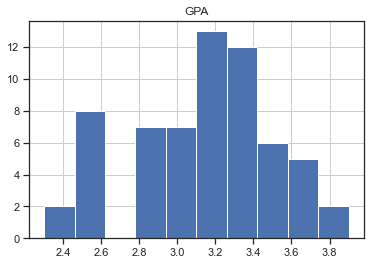

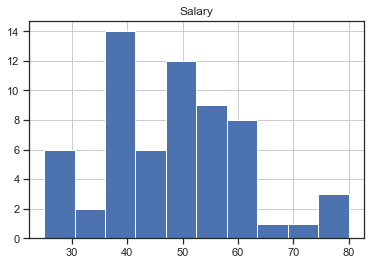

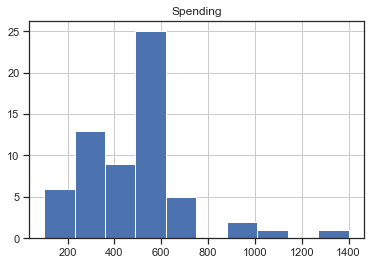

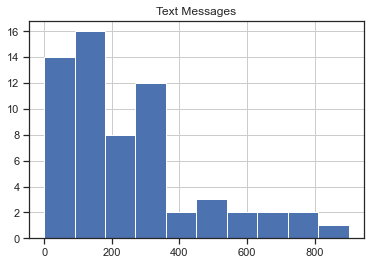

In [78]:
survey_df.hist('GPA')
survey_df.hist('Salary')
survey_df.hist('Spending')
survey_df.hist('Text Messages')

- We will use distplot to know the normal ditribution of these four continuous variables in the data set 
- GPA
- Salary
- Spending
- Text Messages

<AxesSubplot:xlabel='GPA', ylabel='Density'>

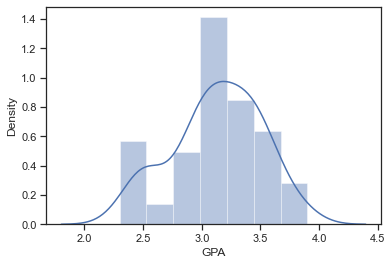

In [79]:
sns.distplot(survey_df['GPA'])


<AxesSubplot:xlabel='Spending', ylabel='Density'>

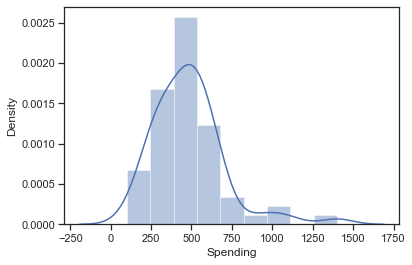

In [80]:
sns.distplot(survey_df['Spending'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

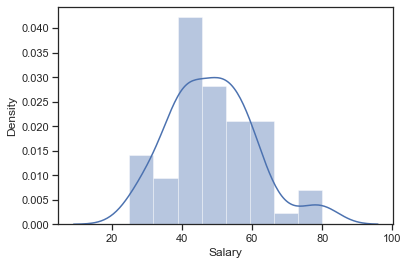

In [81]:
sns.distplot(survey_df['Salary'])

<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

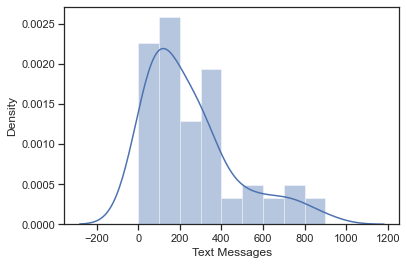

In [82]:
sns.distplot(survey_df['Text Messages'])

- Kde gives the distribution curve shown,
### From the above distribution plots we concluded that:

#### 1. GPA: Follows Normal Distribution.
#### 2. Salary: Follows a skewed Normal Distribution.
#### 3. Spending: Follows Normal Distribution.
#### 4. Text Messages: Does not follows Normal Distribution.

### Problem 3
### Problem Statement:
### An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

### The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [83]:
# Get the data.
shingles_df= pd.read_csv('A+&+B+shingles.csv')

In [84]:
# Displaying top 5 head of the data set.
shingles_df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [85]:
# Show the dimention (number of rows and columns).
shingles_df.shape

(36, 2)

In [86]:
print("The total numbe rof rows are",shingles_df.shape[0],"\nThe total number of columns are",shingles_df.shape[1])

The total numbe rof rows are 36 
The total number of columns are 2


In [87]:
# Get the summary of data
shingles_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


## Qustion 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

### Calculating for A.
#### Define the null and alternative hypothesis.
* $H_0$= mean moisture content <= 0.35 pounds/100 sq.ft
* $H_a$= mean moisture content > 0.35 pounds/100 sq.ft


#### Deciding the significance level
Taking alpha as 0.05, in case it is not specified.

$\alpha$ = 0.05.

#### Identifying test statistics
we use the t distribution and the $t_{STAT}$ test statistic.

### Calculate the p - value and test statistic A.

In [88]:
t_statistic, p_value = ttest_1samp(shingles_df.A, 0.35)
print('One sample t test \nt statistic: {0}, p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782, p value: 0.07477633144907513 


#### t statistic=  -1.4735046253382782,
#### p value=  0.07477633144907513

Since pvalue > 0.05, fail to reject H0 . There is not enough evidence to conclude that the mean moisture content for Sample A shingles is less than 0.35 pounds per 100 square feet. p-value = 0.0748. If thepopulation mean moisture content is in fact no less than 0.35 pounds per 100 square feet, the probability of observing a sample of 36 shingles that will result in a sample mean moisture content of 0.3166 pounds per 100 square feet or less is 0.0747.

### Calculating for B.
#### Define the null and alternative hypothesis.
* $H_0$= mean moisture content <= 0.35 pounds/100 sq.ft
* $H_a$= mean moisture content > 0.35 pounds/100 sq.ft


#### Deciding the significance level
Taking alpha as 0.05, in case it is not specified.

$\alpha$ = 0.05.

#### Identifying test statistics
we use the t distribution and the $t_{STAT}$ test statistic.

### Calculate the p - value and test statistic for B.

In [89]:
t_statistic,p_value= ttest_1samp(shingles_df.B,0.35,nan_policy='omit')
print('One sample t test \nt statistic: {0}, p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995, p value: 0.0020904774003191826 


#### t statistic=  -3.1003313069986995, 
#### p value=  0.0020904774003191826. 

Since pvalue < 0.05, reject H0 . There is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet. p-value = 0.0020. If the population mean moisture content is in fact no less than 0.35 pounds per 100 square feet, the probability of observing a sample of 31 shingles that will result in a sample mean moisture content of 0.2735 pounds per 100 square feet or less is 0.0021.

## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### Define the null and alternative hypothesis.
* $H_0$= $\mu$(A)= $\mu$(B)
* $H_a$= $\mu$(A) $\neq$ $\mu$(B)

#### Deciding the significance level
Taking alpha as 0.05, in case it is not specified.

$\alpha$ = 0.05.

#### Identifying test statistics
we use the t distribution and the $t_{STAT}$ test statistic.
2 sample T_test .

In [90]:
t_statistic,p_value=ttest_ind(shingles_df['A'],shingles_df['B'],equal_var=True ,nan_policy='omit')  

print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3)))  

t_statistic=1.29 and pvalue=0.202


#### t_statistic=1.29 and
#### p_value=0.202


As the pvalue > α , do not reject H0; and we can say that population mean for shingles A and B are equal Test Assumptions When running a two-sample t-test, the basic assumptions are that the distributions of the two populations are normal, and that the variances of the two distributions are the same. If those assumptions are not likely to be met, another testing procedure could be use.